In [1]:
from bluepyopt.allenapi.allen_data_driven import opt_setup, opt_setup_two, opt_exec, opt_to_model
from neuronunit.optimization.optimization_management import check_bin_vm15
from neuronunit.optimization.model_parameters import MODEL_PARAMS, BPO_PARAMS, to_bpo_param
from neuronunit.optimization.optimization_management import dtc_to_rheo,inject_and_plot_model
from bluepyopt.allenapi.allen_data_driven import opt_to_model
from utils import dask_map_function
import matplotlib.pyplot as plt
import numpy as np
from neuronunit.optimization.data_transport_container import DataTC
import efel
from jithub.models import model_classes

import quantities as qt


#import builtins
#from inspect import getframeinfo, stack
#original_print = print

#def print_wrap(*args, **kwargs):
#    caller = getframeinfo(stack()[1][0])
#    original_print("FN:",caller.filename,"Line:", caller.lineno,"Func:", caller.function,":::", *args, **kwargs)

#builtins.print = print_wrap

ids = [ 324257146,
        325479788,
        476053392,
        623893177,
        623960880,
        482493761,
        471819401
       ]

specimen_id = ids[1]
efel.__file__
efel_list = list(efel.getFeatureNames());
cellmodel = "IZHI"

/home/user/anaconda3/lib/python3.7/site-packages/cerberus/validator.py:1609: UserWarning: No validation schema is defined for the arguments of rule 'not_zero_obs_zscore'
  "'%s'" % method_name.split('_', 2)[-1]
test


In [2]:
from numba import vectorize
import numpy as np
@vectorize(['float32(float32, float32)',
            'float64(float64, float64)'],target='cpu')
def summ(a, b):
    return a + b

npoints = int(1e7)
a = np.arange(npoints,dtype=np.float32)

result = summ(a,a)
result


array([0.0000000e+00, 2.0000000e+00, 4.0000000e+00, ..., 1.9999994e+07,
       1.9999996e+07, 1.9999998e+07], dtype=float32)

# TODO make a nested Genetic Algorithm where the outer loop explores different preferred currents.

This will get rid of the oscillations.

In [3]:

#cellmodel = "ADEXP";
if cellmodel == "IZHI":
    model = model_classes.IzhiModel()
if cellmodel == "MAT":
    model = model_classes.MATModel()
if cellmodel == "ADEXP":
    model = model_classes.ADEXPModel()



specimen id 623960880 \\
{\small  
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/623960880}
specimen id 623893177 \\
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/623893177}
specimen id 482493761 \\
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/482493761}
specimen id 471819401 \\
\url{http://celltypes.brain-map.org/mouse/experiment/electrophysiology/471819401}


In [4]:
#'sag_ratio2_1.5x',
#'ohmic_input_resistance_1.5x',
#'sag_ratio2_1.5x',

    

In [5]:
specific_filter_list = ['ISI_log_slope_1.5x',
                        'mean_frequency_1.5x',
                        'adaptation_index2_1.5x',
                        'first_isi_1.5x',
                        'ISI_CV_1.5x',
                        'median_isi_1.5x',
                        'Spikecount_1.5x',
                        'all_ISI_values',
                        'ISI_values',
                        'time_to_first_spike',
                        'time_to_last_spike',
                        'time_to_second_spike',
                        'spike_times',
                        'AHP_depth_abs_1.5x',
                        'peak_voltage_1.5x',
                        'voltage_base_1.5x',
                        'voltage']
simple_yes_list = specific_filter_list
target_num_spikes = 8


In [6]:
dtc = DataTC()
dtc.backend = cellmodel
dtc._backend = model._backend

dtc.attrs = model.attrs
dtc.params = {k:np.mean(v) for k,v in MODEL_PARAMS[cellmodel].items()}
dtc.attrs

{'C': 89.7960714285714,
 'a': 0.01,
 'b': 15,
 'c': -60,
 'd': 10,
 'k': 1.6,
 'vPeak': 21.138338933982595,
 'vr': -65.2261863636364,
 'vt': -50,
 'celltype': 3}

In [7]:
model = dtc.dtc_to_model()
model.attrs



dir(model)
#vm = model._backend.get_membrane_potential()
#vm = model.get_membrane_potential()#
print(model.backend)

JIT_IZHIBackend


In [8]:
model.params

{'C': <bluepyopt.parameters.Parameter at 0x7f24bc1492d0>,
 'a': <bluepyopt.parameters.Parameter at 0x7f24bc149350>,
 'b': <bluepyopt.parameters.Parameter at 0x7f24bc144b50>,
 'c': <bluepyopt.parameters.Parameter at 0x7f24bc144350>,
 'd': <bluepyopt.parameters.Parameter at 0x7f24bc144890>,
 'k': <bluepyopt.parameters.Parameter at 0x7f24bc1449d0>,
 'vPeak': <bluepyopt.parameters.Parameter at 0x7f24bc144250>,
 'vr': <bluepyopt.parameters.Parameter at 0x7f24bc144a50>,
 'vt': <bluepyopt.parameters.Parameter at 0x7f24bc144110>,
 'celltype': <bluepyopt.parameters.Parameter at 0x7f24bc1440d0>}

In [9]:


dtc = dtc_to_rheo(dtc)
print(dtc.rheobase)
print(dtc.backend)


#dtc_to_rheo()

122.5711024730117 pA
IZHI


<Figure size 432x288 with 0 Axes>

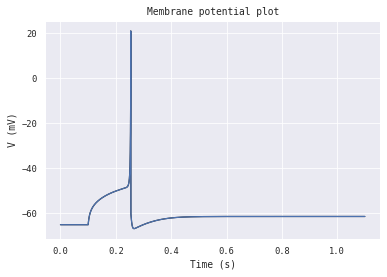

122.5711024730117 pA


In [10]:
vm,plt,dtc = inject_and_plot_model(dtc,plotly=False)
plt.show()
print(dtc.rheobase)


In [11]:
fixed_current = 122 *qt.pA
model.params

{'C': <bluepyopt.parameters.Parameter at 0x7f24bc1492d0>,
 'a': <bluepyopt.parameters.Parameter at 0x7f24bc149350>,
 'b': <bluepyopt.parameters.Parameter at 0x7f24bc144b50>,
 'c': <bluepyopt.parameters.Parameter at 0x7f24bc144350>,
 'd': <bluepyopt.parameters.Parameter at 0x7f24bc144890>,
 'k': <bluepyopt.parameters.Parameter at 0x7f24bc1449d0>,
 'vPeak': <bluepyopt.parameters.Parameter at 0x7f24bc144250>,
 'vr': <bluepyopt.parameters.Parameter at 0x7f24bc144a50>,
 'vt': <bluepyopt.parameters.Parameter at 0x7f24bc144110>,
 'celltype': <bluepyopt.parameters.Parameter at 0x7f24bc1440d0>}

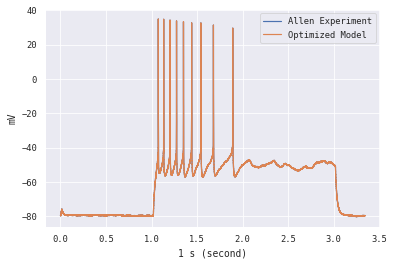

In [12]:
model.params
model.backend
model, suite, nu_tests, target_current, spk_count = opt_setup(specimen_id,
                                                              cellmodel,
                                                              target_num_spikes,provided_model=model,fixed_current=False)


In [13]:
suite.tests[-1].observation

{'mean': 1.891995, 'std': 1.891995}

In [14]:
target_current


{'value': array(209.17493939) * pA}

In [15]:
model.seeded_current = target_current['value']
model.allen = True
model.seeded_current
model.NU = True
cell_evaluator,simple_cell = opt_setup_two(model,cellmodel, suite, nu_tests, target_current, spk_count,provided_model=model)
NGEN = 250
MU = 20

# TODO use pebble instead.
#builtins.print = print_wrap

mapping_funct = dask_map_function
final_pop, hall_of_fame, logs, hist = opt_exec(MU,NGEN,mapping_funct,cell_evaluator)

IzhiModel <jithub.models.backends.izhikevich.JIT_IZHIBackend object at 0x7f24b2c3f810>
IzhiModel <jithub.models.backends.izhikevich.JIT_IZHIBackend object at 0x7f24b2c3f810>


gen	nevals	avg    	std    	min    	max  
1  	20    	4158.41	4577.12	1369.23	22000


2  	17    	3642.06	3519.48	1369.23	22000
3  	11    	2863.85	3530.21	994.822	17991.4
4  	10    	1729.13	1389.97	994.822	8074.05
5  	9     	1257.86	800.723	994.822	5084.41
6  	13    	2979.01	1916.35	994.822	5579.25
7  	12    	3432.95	1715.89	994.822	5330.9 
8  	14    	2275.54	1438.09	968.913	5014.66
9  	18    	1676.07	924.625	968.913	5314.85
10 	14    	2206.43	1553.67	922.896	5314.85
11 	14    	1413.66	238.552	922.896	1809.07
12 	13    	1581.22	462.715	922.896	2942.68
13 	13    	1672.73	687.724	922.896	4888.6 
14 	12    	1422.7 	875.617	922.896	5314.85
15 	10    	1417.27	484.22 	922.896	2942.53
16 	14    	1753.5 	1192.19	922.896	6943.65
17 	14    	1725.63	784.4  	922.896	3330.69
18 	16    	2491.48	3087.32	922.896	12661.4
19 	16    	1892.82	642.715	922.896	2937.16
20 	15    	1341.09	270.747	922.896	1886.44
21 	10    	1779.1 	1410.93	922.896	8721.91
22 	11    	1276.48	457.162	922.896	2937.16
23 	8     	1438.96	936.921	922.896	5028.17
24 	13    	2023.39	1184.54	922.896	5028.17
25 	10    	20

193	15    	1478.6 	858.374	818.101	4076.6 
194	15    	1388.6 	556.006	818.101	3264.77
195	10    	1591.59	1008.64	818.101	5108.01
196	15    	1695.29	743.222	818.101	3264.79
197	13    	1507.58	1027.91	776.865	5429.85
198	14    	1581.6 	1006.8 	776.865	5122.76
199	9     	2668.49	1732.41	776.865	5578.41
200	12    	3418.44	1541.2 	776.865	5148.97
201	10    	1996.67	1576.34	776.865	5576.24
202	16    	1757.98	1749.69	776.865	5372.63
203	9     	2797.47	1807.1 	776.865	5120.76
204	13    	1573.86	816.291	776.865	5305.37
205	16    	1604.97	830.691	776.865	4992.92
206	11    	1343.98	800.482	776.865	5097.62
207	14    	1846.02	1309.47	776.865	5117.95
208	10    	1551.33	986.193	776.865	5004.85
209	13    	1847.94	1045.94	776.865	4816.85
210	7     	1902.01	1440.55	776.865	5032.34
211	11    	2624.65	1545.63	776.865	4826.67
212	15    	1480.62	227.351	776.865	1864.98
213	13    	1379.34	393.33 	776.865	2821.13
214	11    	1332.22	540.895	776.865	3089.88
215	15    	1741.23	673.142	776.865	3089.88
216	14    	

In [16]:
target_current

{'value': array(209.17493939) * pA}

In [17]:

opt,target = opt_to_model(hall_of_fame,cell_evaluator,suite, target_current, spk_count)

In [18]:
best_ind = hall_of_fame[0]
fitnesses = cell_evaluator.evaluate_with_lists(best_ind)
fitnesses;

In [19]:
best_ind

[20.13999007141571,
 1.1004618155915795,
 -55.96330826869714,
 -46.1880900857649,
 11.674446252943268,
 0.010555388012489862,
 -1.2265515728009946,
 -48.53486326875858,
 -31.566133590941387,
 4.811855358492737]

In [20]:
obnames = [obj.name for obj in cell_evaluator.objectives]

for i,j in zip(fitnesses,obnames):
    print(i,j)

43.4384678156068 burst_mean_freq_1.5x
1.0 burst_number_1.5x
0.5195919331239606 single_burst_ratio_1.5x
0.002977383802611644 ISI_log_slope_1.5x
2.5118114369934954 mean_frequency_1.5x
0.0499261049220706 adaptation_index2_1.5x
1.8766923902597783 ISI_CV_1.5x
0.0 Spikecount_1.5x
8.812499999991985 all_ISI_values_1.5x
16.771428571413324 ISI_values_1.5x
225.399999999795 time_to_first_spike_1.5x
295.8999999997309 time_to_last_spike_1.5x
178.49999999983766 time_to_second_spike_1.5x
0.22561500000000012 spike_0_1.5x
0.17872 spike_1_1.5x
0.12167000000000017 spike_2_1.5x
0.06532999999999989 spike_3_1.5x
0.007000000000000117 spike_4_1.5x
0.06784499999999993 spike_5_1.5x
0.6237600000000001 spike_6_1.5x
0.4951049999999999 spike_7_1.5x
0.29625499999999994 spike_8_1.5x


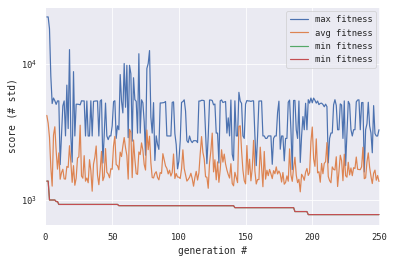

In [21]:
#for obj in cell_evaluator2.objectives:
#    print(obj.name)

gen_numbers = logs.select('gen')
min_fitness = logs.select('min')
max_fitness = logs.select('max')
avg_fitness = logs.select('avg')
plt.plot(gen_numbers, max_fitness, label='max fitness')
plt.plot(gen_numbers, avg_fitness, label='avg fitness')
plt.plot(gen_numbers, min_fitness, label='min fitness')

plt.plot(gen_numbers, min_fitness, label='min fitness')
plt.semilogy()
plt.xlabel('generation #')
plt.ylabel('score (# std)')
plt.legend()
plt.xlim(min(gen_numbers) - 1, max(gen_numbers) + 1)
plt.show()

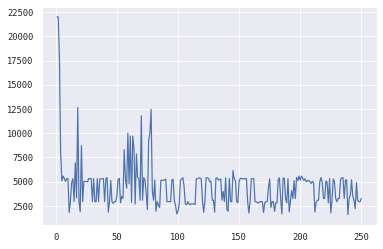

In [22]:
plt.plot(gen_numbers, max_fitness, label='max fitness')
plt.show()

'JIT_IZHIBackend'

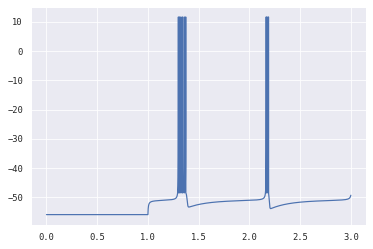

In [23]:
opt.attrs
#opt.attrs['a'] = 0.0
#opt.attrs['b'] = 0.0

#opt.attrs['v_rest'] = -60
#opt.attrs['tau_w'] = 0.05
#opt.attrs['cm'] = 1

opt.vm15 = None
from neuronunit.optimization.optimization_management import inject_model30
#vm15,_,_,opt = inject_model30(opt)
vm15,_,_,opt=inject_model30(opt,solve_for_current=target_current)

model = opt.dtc_to_model()

plt.plot(opt.vm15.times,opt.vm15)
opt.vm15
model.attrs
model.backend

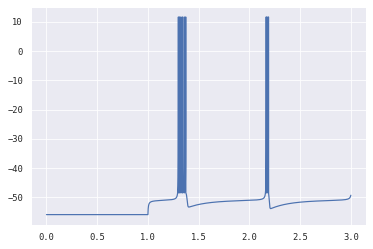

{'C': 20.13999007141571,
 'k': 1.1004618155915795,
 'vr': -55.96330826869714,
 'vt': -46.1880900857649,
 'vPeak': 11.674446252943268,
 'a': 0.010555388012489862,
 'b': -1.2265515728009946,
 'c': -48.53486326875858,
 'd': -31.566133590941387,
 'celltype': 5}

In [24]:

import matplotlib.pyplot as plt

plt.plot(opt.vm15.times,opt.vm15)
plt.show()


opt.attrs


In [25]:
opt.vm15.units

#opt.vm15 = opt.vm15.rescale('mV').magnitude


array(1.) * mV

In [26]:
target_current

{'value': array(209.17493939) * pA}

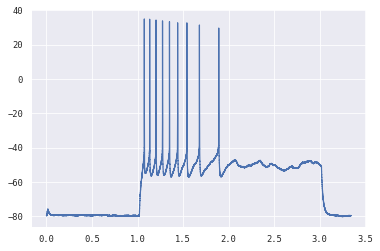

In [27]:
target.vm15 = suite.traces['vm15']

plt.plot(target.vm15.times,target.vm15)
plt.show()


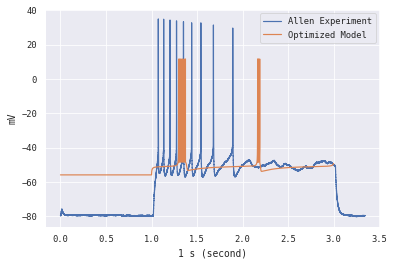

{'C': 20.13999007141571,
 'k': 1.1004618155915795,
 'vr': -55.96330826869714,
 'vt': -46.1880900857649,
 'vPeak': 11.674446252943268,
 'a': 0.010555388012489862,
 'b': -1.2265515728009946,
 'c': -48.53486326875858,
 'd': -31.566133590941387,
 'celltype': 5}

In [28]:
target.vm15 = suite.traces['vm15']
#opt.attrs['a'] = 0.0
#opt.attrs['vr'] = -80
check_bin_vm15(target,opt)
opt.attrs



In [29]:
'''
import bluepyopt as bpop
from utils import dask_map_function
optimisation = bpop.optimisations.DEAPOptimisation(
        evaluator=cell_evaluator2,
        offspring_size = MU,
        map_function = dask_map_function,
        selector_name='IBEA',mutpb=0.1,cxpb=0.35,seeded_pop=[cp['final_pop'],cp['hall_of_fame']])#,seeded_current=target_current)
final_pop, hall_of_fame, logs, hist = optimisation.run(max_ngen=50)
'''

"\nimport bluepyopt as bpop\nfrom utils import dask_map_function\noptimisation = bpop.optimisations.DEAPOptimisation(\n        evaluator=cell_evaluator2,\n        offspring_size = MU,\n        map_function = dask_map_function,\n        selector_name='IBEA',mutpb=0.1,cxpb=0.35,seeded_pop=[cp['final_pop'],cp['hall_of_fame']])#,seeded_current=target_current)\nfinal_pop, hall_of_fame, logs, hist = optimisation.run(max_ngen=50)\n"

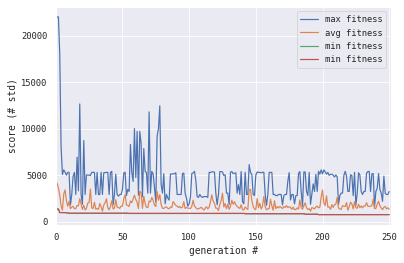

In [30]:
gen_numbers = logs.select('gen')
min_fitness = logs.select('min')
max_fitness = logs.select('max')
avg_fitness = logs.select('avg')
plt.plot(gen_numbers, max_fitness, label='max fitness')
plt.plot(gen_numbers, avg_fitness, label='avg fitness')
plt.plot(gen_numbers, min_fitness, label='min fitness')

plt.plot(gen_numbers, min_fitness, label='min fitness')
#plt.semilogy()
plt.xlabel('generation #')
plt.ylabel('score (# std)')
plt.legend()
plt.xlim(min(gen_numbers) - 1, max(gen_numbers) + 1)
plt.show()


In [31]:
for obj in cell_evaluator.objectives:
    print(obj.name)


burst_mean_freq_1.5x
burst_number_1.5x
single_burst_ratio_1.5x
ISI_log_slope_1.5x
mean_frequency_1.5x
adaptation_index2_1.5x
ISI_CV_1.5x
Spikecount_1.5x
all_ISI_values_1.5x
ISI_values_1.5x
time_to_first_spike_1.5x
time_to_last_spike_1.5x
time_to_second_spike_1.5x
spike_0_1.5x
spike_1_1.5x
spike_2_1.5x
spike_3_1.5x
spike_4_1.5x
spike_5_1.5x
spike_6_1.5x
spike_7_1.5x
spike_8_1.5x


In [32]:
import efel
simple_yes_list = list(efel.getFeatureNames())
simple_yes_list

['AHP1_depth_from_peak',
 'AHP2_depth_from_peak',
 'AHP_depth',
 'AHP_depth_abs',
 'AHP_depth_abs_slow',
 'AHP_depth_diff',
 'AHP_depth_from_peak',
 'AHP_slow_time',
 'AHP_time_from_peak',
 'AP1_amp',
 'AP1_begin_voltage',
 'AP1_begin_width',
 'AP1_peak',
 'AP1_width',
 'AP2_AP1_begin_width_diff',
 'AP2_AP1_diff',
 'AP2_AP1_peak_diff',
 'AP2_amp',
 'AP2_begin_voltage',
 'AP2_begin_width',
 'AP2_peak',
 'AP2_width',
 'AP_amplitude',
 'AP_amplitude_change',
 'AP_amplitude_diff',
 'AP_amplitude_from_voltagebase',
 'AP_begin_indices',
 'AP_begin_time',
 'AP_begin_voltage',
 'AP_begin_width',
 'AP_duration',
 'AP_duration_change',
 'AP_duration_half_width',
 'AP_duration_half_width_change',
 'AP_end_indices',
 'AP_fall_indices',
 'AP_fall_rate',
 'AP_fall_rate_change',
 'AP_fall_time',
 'AP_height',
 'AP_phaseslope',
 'AP_phaseslope_AIS',
 'AP_rise_indices',
 'AP_rise_rate',
 'AP_rise_rate_change',
 'AP_rise_time',
 'AP_width',
 'APlast_amp',
 'APlast_width',
 'BAC_maximum_voltage',
 'BAC_w

'trace_check'